#### Author: Yash Shinge - IPNNL
#### Program assignment 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 6,6
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 13.0

pi = np.pi

In [2]:
def DAmp(w1):

    def stepin(i):
        if i > 0:
            return 1
        return 0
        
    H = w1 * stepin(w1) - 2 * ( w1 - pi / 4 ) * stepin( w1 - pi/4 ) \
        + ( w1 - 3 * ( pi / 8 )) * stepin( w1 - 3 * ( pi / 8 )) \
        - ( pi / 8 ) * ( stepin ( w1 - 5 * ( pi / 8 )))

    return H



def AMP(Nm, x, Nx):
    
    Am = np.zeros((Nm,), float)
    w = np.zeros((Nm,), float)
    pi = np.pi

    for k in range(1, Nm+1):
        w[k-1] = (pi * (k-1))/(Nm-1)

        Z = np.exp(1j * w[k-1])

        amplitude = 0

        for m in range(1, Nx+1):
            amplitude += x[m-1] * (Z ** (m-1))

        Am[k-1] = abs(amplitude)
    return Am, w



def standard_conv(x, h):
    
    Nx = len(x)
    Nh = len(h)
    X = np.hstack((x, np.zeros((Nx,), float)))
    H = np.hstack((h, np.zeros((Nh,), float)))
    
    
    Ny = Nx + Nh - 1
    y = np.zeros((Ny,), float)

    for p in range(Ny):
        for q in range(Nh):
            if (p - q + 1 > 0):
                y[p] += H[q] * X[ p - q]
                
    return y

In [3]:
Nh = 129
N = 256

dim = N // 2 + 1
w = np.zeros((dim, ), float)

for k in range(1, dim + 1):
    w[k - 1] = 2 * pi * (k - 1) / N

In [38]:
STEP = 2 * pi / N
OM = 0 

H = np.zeros((N, ), complex)
ampH = np.zeros((N, ), float)

for k in range(2, dim + 1):
    OM += STEP
    ampH[k-1] = DAmp(OM)
    H[k-1] = DAmp(OM) * np.exp(-1j * ( Nh - 1 ) * OM /2)
    
    H[N + 2 - k - 1 ] = np.conj(H[k-1])
    

ampH = ampH[:Nh]

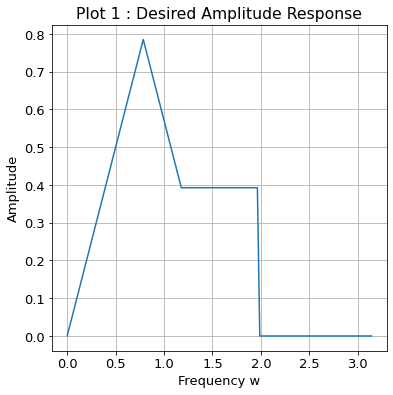

In [39]:
plt.plot(w, ampH)
plt.title('Plot 1 : Desired Amplitude Response')
plt.xlabel('Frequency w')
plt.ylabel('Amplitude')
plt.show()

### Taking inverse FFT to obtain filter h(n)

In [40]:
hn = np.fft.ifft(H, N).real

In [41]:
h = hn[:Nh]

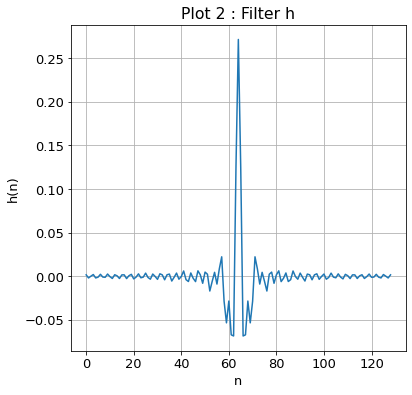

In [42]:
plt.plot(h)
plt.title('Plot 2 : Filter h')
plt.xlabel('n')
plt.ylabel('h (n)')
plt.show()

### Generating and plotting Amp response of the filter to compare with the Desired response (plot1).
Both should appear similar.

In [9]:
h1 = np.hstack( (h, np.zeros((N-Nh, ), float)) )

In [10]:
H1, w1 = AMP(Nh, h1, N)

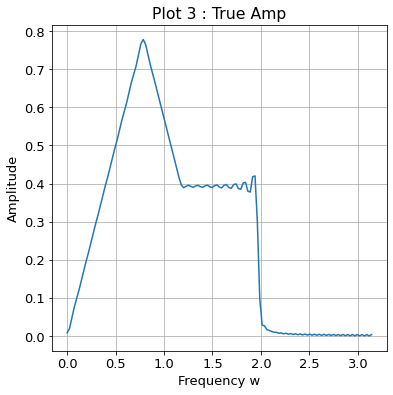

In [11]:
plt.plot(w1, H1)
plt.title('Plot 3 : True Amp')
plt.xlabel('Frequency w')
plt.ylabel('Amplitude')
plt.show()

#### Using the Filter

In [12]:
Nx = 256 ;
x = np.zeros((Nx,), float)

for n in range(1, Nx + 1):
    x[n-1] = np.cos( ( n * 0.2 / Nx ) * n) # Generation of a Chirp with frequency 0.2


#### Generate and plot Amplitude response of x. (plot #4)


In [13]:
X, w2 = AMP(100, x, Nx)

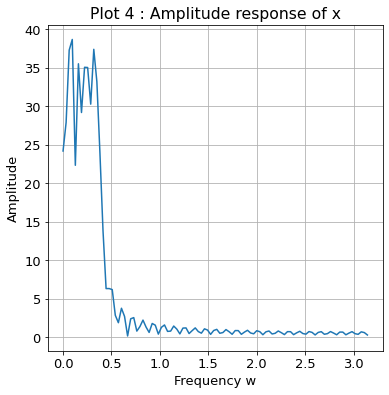

In [14]:
plt.plot(w2, X)
plt.title('Plot 4 : Amplitude response of x')
plt.xlabel('Frequency w')
plt.ylabel('Amplitude')
plt.show()

#### Perform convolution of x and the filter to obtain y, and plot y. (plot #5)


In [15]:
y = standard_conv(x, h)
Ny = len(y)

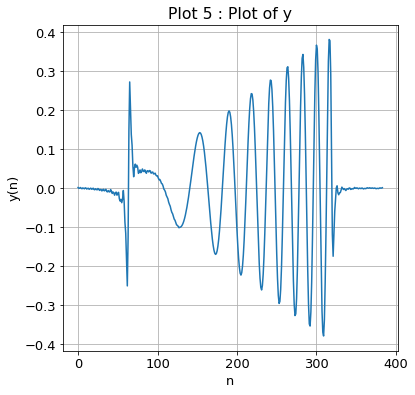

In [16]:
plt.plot(y)
plt.title('Plot 5 : Plot of y')
plt.xlabel('n')
plt.ylabel('y (n)')
plt.show()

#### Generate and plot Amplitude response of y. (plot #6)

In [17]:
Y, w3 = AMP(100, y, Ny)

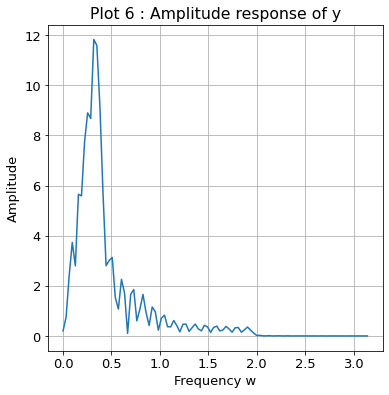

In [18]:
plt.plot(w3, Y)
plt.title('Plot 6 : Amplitude response of y')
plt.xlabel('Frequency w')
plt.ylabel('Amplitude')
plt.show()